In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import requests
from config import gkey
import gmaps
import time
import json
from scipy.stats import pearsonr

# Combin Zillow and Census Data - City demographics vs Home Value 

In [2]:
#Zillow CA Data
zillow_ca_df=pd.read_csv("zillow_ca_homevalue.csv")
#Census CA Data
census_pd=pd.read_csv("census_data.csv")


In [3]:
combined_ca = pd.merge(census_pd, zillow_ca_df, on="Zipcode")
combined_ca["Avg_HomeValue"]= (combined_ca["2016-01"]+combined_ca["2016-02"]+combined_ca["2016-03"]+combined_ca["2016-04"]+
                              combined_ca["2016-05"]+combined_ca["2016-06"]+combined_ca["2016-07"]+combined_ca["2016-08"]+
                              combined_ca["2016-09"]+combined_ca["2016-10"]+combined_ca["2016-11"]+combined_ca["2016-12"])/12
combined_ca = combined_ca[["Zipcode","City","State","CountyName","Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate","average rent","Median Home Value","Number of House Build in year","Avg_HomeValue","Employment Rate"]]
combined_ca.head(10)
#csv
combined_ca.to_csv("Census_Zillow_Combined_CA.csv",index = False)


In [4]:
#Groupby County

combined_county = combined_ca.groupby("CountyName")
combined_county_city = combined_county ["City"].count()
combined_county_city

CountyName
Alameda             46
Amador               8
Butte               12
Calaveras            8
Contra Costa        33
El Dorado           16
Fresno              38
Glenn                2
Humboldt            10
Imperial             5
Inyo                 3
Kern                27
Kings                4
Lake                 7
Lassen               2
Los Angeles        266
Madera               9
Marin               16
Mariposa             3
Mendocino            6
Merced              10
Modoc                1
Mono                 3
Monterey            16
Napa                 7
Nevada               8
Orange              84
Placer              22
Plumas               5
Riverside           60
Sacramento          47
San Benito           3
San Bernardino      58
San Diego           87
San Francisco       24
San Joaquin         24
San Luis Obispo     18
San Mateo           25
Santa Barbara       18
Santa Clara         52
Santa Cruz          12
Shasta               8
Siskiyou             8


In [5]:
# create bin for age range added into combined data sheet
age_bins=[0,20,30,40,50,60,70]
age_group=["0-20","21-30","31-40","41-50","51-60","61-70"]
combined_ca["Age Range"] = pd.cut(combined_ca["Median Age"], age_bins, labels=age_group)
combined_ca.head(10)

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413,21-30
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911,21-30
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700,21-30
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954,31-40
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249,31-40
5,90006,Los Angeles,CA,Los Angeles,61230.0,33.6,31993.0,14306.0,17456.0,28.508901,916.0,469200.0,1950.0,5.459500e+05,55.905602,31-40
6,90007,Los Angeles,CA,Los Angeles,41979.0,24.3,22485.0,11658.0,17605.0,41.937635,1000.0,421200.0,1955.0,5.202000e+05,45.208318,21-30
7,90008,Los Angeles,CA,Los Angeles,32060.0,43.7,36134.0,28316.0,6769.0,21.113537,940.0,507900.0,1953.0,6.471167e+05,50.333749,41-50
8,90011,Los Angeles,CA,Los Angeles,104762.0,28.2,31684.0,10103.0,40661.0,38.812737,888.0,294800.0,1944.0,3.203000e+05,44.343369,21-30
9,90012,Los Angeles,CA,Los Angeles,32543.0,35.8,32712.0,21989.0,7755.0,23.830010,1121.0,432700.0,1984.0,4.649500e+05,38.370771,31-40


In [6]:
#sort the data based on Media Home Value
combined_ca=combined_ca.sort_values(["Median Home Value"],ascending=False)
combined_ca=combined_ca.reset_index(drop=True)
combined_ca.head(20)
#get top 20 highest Home Value City
top_20_homevalue = combined_ca.head(10)
top_20_homevalue

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range
0,94957,Ross,CA,Marin,1314.0,46.8,250001.0,122798.0,85.0,6.468798,2050.0,2000001.0,1943.0,3.078942e+06,42.009132,41-50
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,40.330737,41-50
2,92657,Newport Coast,CA,Orange,9768.0,49.8,195051.0,117924.0,194.0,1.986077,2398.0,2000001.0,1998.0,2.571683e+06,54.043817,41-50
3,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,48.895874,51-60
4,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60
5,92662,Newport Beach,CA,Orange,2863.0,57.2,97206.0,99838.0,104.0,3.632553,1958.0,2000001.0,1955.0,2.564192e+06,52.008383,51-60
6,90402,Santa Monica,CA,Los Angeles,11410.0,50.1,140612.0,115123.0,847.0,7.423313,1826.0,2000001.0,1956.0,3.452483e+06,50.867660,51-60
7,92067,Rancho Santa Fe,CA,San Diego,9127.0,50.3,133355.0,67233.0,966.0,10.583982,1579.0,2000001.0,1990.0,2.727625e+06,34.622548,51-60
8,94301,Palo Alto,CA,Santa Clara,17409.0,42.9,135427.0,93365.0,1276.0,7.329542,1948.0,2000001.0,1956.0,3.476100e+06,53.294273,41-50
9,94024,Los Altos,CA,Santa Clara,23057.0,46.3,204534.0,94996.0,718.0,3.114022,2444.0,2000001.0,1960.0,2.797450e+06,44.802012,41-50


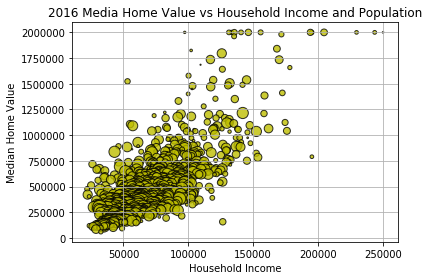

In [14]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Household Income"]>0)]
#scatter chart Home Value vs population and Household Income
plot_1 = combined_ca.plot(kind = "scatter",x = "Household Income",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs Household Income and Population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs Household Income and Population.png")
#show figure 
plt.show()

In [11]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Household Income"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between household income and home value.")

P-value is 1.9569578295545415e-237, which shows there is correlation between household income and home value.


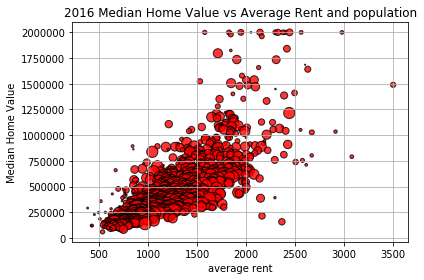

In [15]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["average rent"]>0)]
#scatter chart Median Home Value vs Average Rent and population
plot_3 = combined_ca.plot(kind = "scatter",x = "average rent",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "red",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Median Home Value vs Average Rent and population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Median Home Value vs Average Rent and population.png")
#show figure 
plt.show()

In [16]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["average rent"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between average rent and home value.")

P-value is 1.0531185015839029e-225, which shows there is correlation between average rent and home value.


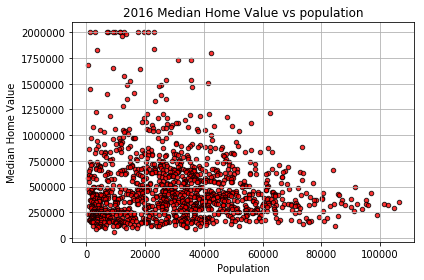

In [19]:
#scatter chart Median Home Value vs Average Rent and population
plot_4 = combined_ca.plot(kind = "scatter",x = "Population",y = "Median Home Value",
                           c = "red",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Median Home Value vs population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Median Home Value vs population.png")
#show figure 
plt.show()

In [20]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Population"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between population and home value.")

P-value is 0.0006057986255214741, which shows there is correlation between population and home value.


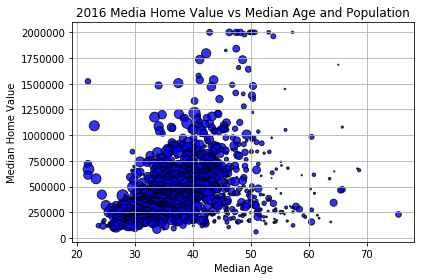

In [23]:
#scatter chart Home Value vs age 
plot_5 = combined_ca.plot(kind = "scatter",x = "Median Age",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "blue",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Media Home Value vs Median Age and Population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs Median Age and Population.png")
#show figure 
plt.show()

In [24]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Median Age"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between age and home value.")

P-value is 1.8119773237169143e-34, which shows there is correlation between age and home value.


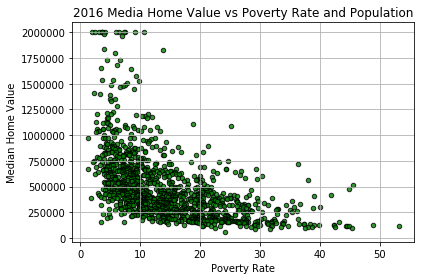

In [43]:
#scatter chart Home Value vs age 
plot_7 = combined_ca.plot(kind = "scatter",x = "Poverty Rate",y = "Median Home Value",
                           c = "green",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Media Home Value vs Poverty Rate and Population" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs Poverty Rate and Population.png")
#show figure 
plt.show()

In [42]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Poverty Rate"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between poverty rate and home value.")

P-value is 8.081803490434749e-81, which shows there is correlation between poverty rate and home value.


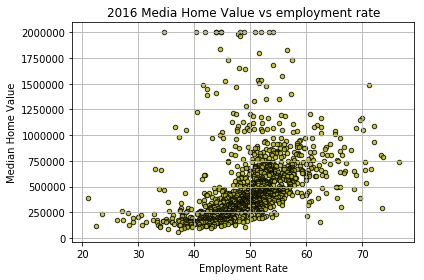

In [25]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Household Income"]>0)]
#scatter chart Home Value vs population and Household Income
plot_6 = combined_ca.plot(kind = "scatter",x = "Employment Rate",y = "Median Home Value",
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs employment rate" )
plt.tight_layout()
# save figure
plt.savefig("2016 Media Home Value vs employment rate.png")
#show figure 
plt.show()

In [26]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Employment Rate"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between Employment Rate and home value.")

P-value is 2.1184263274346533e-49, which shows there is correlation between Employment Rate and home value.


In [27]:
#group by age range, then get the average home value and household income for each age range
combined_ca_group=combined_ca.groupby(["Age Range"])
avg_home_value = combined_ca_group["Median Home Value"].mean()
avg_household_income = combined_ca_group["Household Income"].mean()
avg_capita_income = combined_ca_group["Per Capita Income"].mean()
combined_ca_group =pd.DataFrame({"Avg Home Value":avg_home_value, "Avg Household Income":avg_household_income})
#Drop null values
combined_ca_group = combined_ca_group.dropna(how="any").round(2)
combined_ca_group=combined_ca_group.reset_index()
combined_ca_group

,Age Range,Avg Home Value,Avg Household Income
0,21-30,262837.61,42103.26
1,31-40,427242.06,66137.62
2,41-50,647231.08,86843.57
3,51-60,611138.44,73742.23
4,61-70,561138.89,67831.72


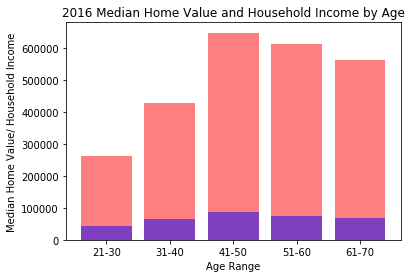

In [31]:
#Plot bar chart by grouped data frame
# Set x axis and tick locations
x_axis = np.arange(len(combined_ca_group))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, combined_ca_group["Avg Home Value"], color='r', alpha=0.5, align="center")
plt.bar(x_axis, combined_ca_group["Avg Household Income"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_ca_group["Age Range"])
plt.title("2016 Median Home Value and Household Income by Age")
plt.xlabel("Age Range")
plt.ylabel("Median Home Value/ Household Income")
# Save an image of the chart and print it to the screen
plt.savefig("2016 Median Home Value by Age (Bar Chart).png")
plt.show()

In [33]:
# create bin for household Income added into combined data sheet
Income_bins=[20000,50000,80000,110000,140000,170000,210000,250001]
Income_group=["20k-50k","50k-80k","80k-110k","110k-140k","140k-170k","170k-210k","210k-250k"]
combined_ca["Income Range"] = pd.cut(combined_ca["Household Income"], Income_bins, labels=Income_group)
combined_ca.head(10)

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range,Income Range
0,94957,Ross,CA,Marin,1314.0,46.8,250001.0,122798.0,85.0,6.468798,2050.0,2000001.0,1943.0,3.078942e+06,42.009132,41-50,210k-250k
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,40.330737,41-50,210k-250k
2,92657,Newport Coast,CA,Orange,9768.0,49.8,195051.0,117924.0,194.0,1.986077,2398.0,2000001.0,1998.0,2.571683e+06,54.043817,41-50,170k-210k
3,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,48.895874,51-60,140k-170k
4,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60,210k-250k
5,92662,Newport Beach,CA,Orange,2863.0,57.2,97206.0,99838.0,104.0,3.632553,1958.0,2000001.0,1955.0,2.564192e+06,52.008383,51-60,80k-110k
6,90402,Santa Monica,CA,Los Angeles,11410.0,50.1,140612.0,115123.0,847.0,7.423313,1826.0,2000001.0,1956.0,3.452483e+06,50.867660,51-60,140k-170k
7,92067,Rancho Santa Fe,CA,San Diego,9127.0,50.3,133355.0,67233.0,966.0,10.583982,1579.0,2000001.0,1990.0,2.727625e+06,34.622548,51-60,110k-140k
8,94301,Palo Alto,CA,Santa Clara,17409.0,42.9,135427.0,93365.0,1276.0,7.329542,1948.0,2000001.0,1956.0,3.476100e+06,53.294273,41-50,110k-140k
9,94024,Los Altos,CA,Santa Clara,23057.0,46.3,204534.0,94996.0,718.0,3.114022,2444.0,2000001.0,1960.0,2.797450e+06,44.802012,41-50,170k-210k


In [36]:
#group by Income range, then get the average home value for each Income range
combined_ca_income=combined_ca.groupby(["Income Range"])
avg_home_value_income = combined_ca_income["Median Home Value"].mean()
combined_ca_income =pd.DataFrame({"Avg Home Value":avg_home_value_income})
#Drop null values
combined_ca_income = combined_ca_income.dropna(how="any").round(2)
combined_ca_income =combined_ca_income.reset_index()
combined_ca_income

,Income Range,Avg Home Value
0,20k-50k,258219.44
1,50k-80k,417920.23
2,80k-110k,657880.60
3,110k-140k,975456.29
4,140k-170k,1271881.10
5,170k-210k,1556089.22
6,210k-250k,2000001.00


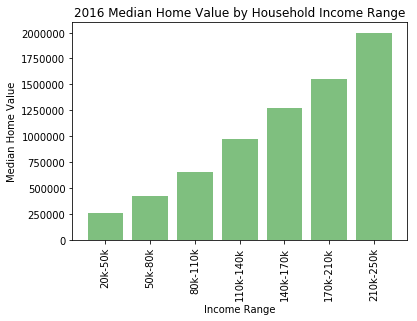

In [38]:
#Plot bar chart by income grouped data frame
# Set x axis and tick locations
x_axis = np.arange(len(combined_ca_income))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, combined_ca_income["Avg Home Value"], color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_ca_income["Income Range"],rotation="vertical")
plt.title("2016 Median Home Value by Household Income Range")
plt.xlabel("Income Range")
plt.ylabel("Median Home Value")
# Save an image of the chart and print it to the screen
plt.savefig("2016 Median Home Value by Income (Bar Chart).png")
plt.show()

# Get City Loaction via OpenWeather API

In [48]:
api_key = "Enter API KEY"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

combined_ca["Latitude"] = ""
combined_ca["Longitude"] = ""
combined_ca["Temp"] = ""

for index, row in combined_ca.iterrows():
    city = row["City"]+",us"
    response = requests.get(url + city).json()
    
    try:
        combined_ca.loc[index, "Latitude"] = response["coord"]["lat"]
        combined_ca.loc[index, "Longitude"] = response["coord"]["lon"]
        combined_ca.loc[index, "Temp"] = response["main"]["temp"]
        
    except:
        pass
    
combined_ca.head()

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range,Income Range,Latitude,Longitude,Temp
0,94957,Ross,CA,Marin,1314.0,46.8,250001.0,122798.0,85.0,6.468798,2050.0,2000001.0,1943.0,3.078942e+06,42.009132,41-50,210k-250k,41.53,-87.37,72.88
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,40.330737,41-50,210k-250k,37.46,-122.2,66.52
2,92657,Newport Coast,CA,Orange,9768.0,49.8,195051.0,117924.0,194.0,1.986077,2398.0,2000001.0,1998.0,2.571683e+06,54.043817,41-50,170k-210k,,,
3,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,48.895874,51-60,140k-170k,37.87,-122.46,64.72
4,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60,210k-250k,37.38,-122.24,65.07


In [51]:
# limited the lat and lng within California  "min_lat": 32.5121,"max_lat": 42.0126,"min_lng": -124.6509,"max_lng": -114.1315
combined_ca = combined_ca[combined_ca["Latitude"] != ""]
combined_ca = combined_ca[combined_ca["Latitude"] <= 42.0126]
combined_ca = combined_ca[combined_ca["Latitude"] >= 32.5121]
combined_ca = combined_ca[combined_ca["Longitude"] <= -114.1315]
combined_ca = combined_ca[combined_ca["Longitude"] >= -124.6509]
#csv
combined_ca.to_csv("Combined_loc_CA.csv",index = False)
print(combined_ca.count())
combined_ca.head()

Zipcode                          1056
City                             1056
State                            1056
CountyName                       1056
Population                       1056
Median Age                       1056
Household Income                 1056
Per Capita Income                1056
Poverty Count                    1056
Poverty Rate                     1056
average rent                     1056
Median Home Value                1056
Number of House Build in year    1056
Avg_HomeValue                    1056
Employment Rate                  1056
Age Range                        1055
Income Range                     1056
Latitude                         1056
Longitude                        1056
Temp                             1056
dtype: int64


,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range,Income Range,Latitude,Longitude,Temp
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,40.330737,41-50,210k-250k,37.46,-122.2,66.52
3,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,48.895874,51-60,140k-170k,37.87,-122.46,64.72
4,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60,210k-250k,37.38,-122.24,65.07
5,92662,Newport Beach,CA,Orange,2863.0,57.2,97206.0,99838.0,104.0,3.632553,1958.0,2000001.0,1955.0,2.564192e+06,52.008383,51-60,80k-110k,33.62,-117.93,80.33
6,90402,Santa Monica,CA,Los Angeles,11410.0,50.1,140612.0,115123.0,847.0,7.423313,1826.0,2000001.0,1956.0,3.452483e+06,50.867660,51-60,140k-170k,34.02,-118.49,79.03


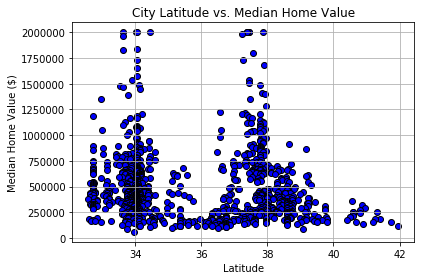

In [52]:
plt.scatter(combined_ca["Latitude"], combined_ca["Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Median Home Value")
plt.ylabel("Median Home Value ($)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()
# save figure
plt.savefig("City Latitude vs. Median Home Value.png")
#show figure 
plt.show()

In [53]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Latitude"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between latitude and home value, but not strong corelation.")

P-value is 0.005104750038080612, which shows there is correlation between latitude and home value, but not strong corelation.


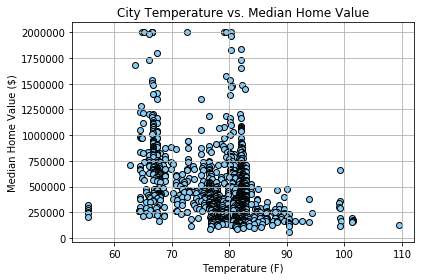

In [54]:
plt.scatter(combined_ca["Temp"], combined_ca["Median Home Value"], marker="o", facecolor="lightskyblue", edgecolor="black")
plt.title("City Temperature vs. Median Home Value")
plt.ylabel("Median Home Value ($)")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.tight_layout()
# save figure
plt.savefig("City Temperature vs. Median Home Value.png")
#show figure 
plt.show()

In [55]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_ca["Temp"], combined_ca["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between temperature and home value.")

P-value is 1.2547052677355456e-32, which shows there is correlation between temperature and home value.


In [57]:
#california whole foods market location data 
#Link for Whole Foods Location Search Jupyter Notebook :
whole_foods_df = pd.read_csv("Whole Foods CA Location.csv")
whole_foods_df.head()

,Name,Latitude,Longitude,Address
0,Whole Foods Market,34.045870,-118.257590,"788 S Grand Ave, Los Angeles"
1,Whole Foods Market,33.976712,-118.418102,"12746 W Jefferson Blvd, Playa Vista"
2,Whole Foods Market,34.022625,-118.438046,"11666 National Blvd, Los Angeles"
3,Whole Foods Market,34.061229,-118.446954,"1050 Gayley Ave, Los Angeles"
4,Whole Foods Market,34.053639,-118.467407,"11737 San Vicente Blvd, Los Angeles"


In [58]:
#california walmart location data
#Link for Walmart Location Search Jupyter Notebook :https://github.com/jwu047/Project_one/blob/master/Walmart_Location_In_California.ipynb
walmart_df = pd.read_csv("Walmart CA Location.csv")
walmart_df.head()

,Name,Latitude,Longitude,Address
0,Walmart Supercenter,33.954813,-118.187613,"4651 Firestone Blvd, South Gate"
1,Walmart Supercenter,33.910008,-118.208162,"2100 N Long Beach Blvd, Compton"
2,Walmart,33.956942,-118.272099,"150 E 88th St, Los Angeles"
3,Walmart Supercenter,34.050425,-118.085373,"1827 Walnut Grove Ave, Rosemead"
4,Walmart Supercenter,33.984986,-118.104991,"8500 Washington Blvd, Pico Rivera"


# Heatmap - Median Home Value by Location¶

In [59]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [60]:
# Store 'Lat' and 'Lng' into  locations 
locations = combined_ca[["Latitude", "Longitude"]].astype(float)

# Convert Home Value/ Population to float and store
# HINT: be sure to handle NaN values
home_value = combined_ca["Median Home Value"].astype(float)
population = combined_ca["Population"].astype(float)
#max home value and poplulation
print(population.max())
print(home_value.max())

106360.0
2000001.0


In [62]:
# Create a home value Heatmap layer
fig = gmaps.figure()
# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '700px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=home_value, 
                                 dissipating=False, max_intensity=2000001,
                                 point_radius = 0.05)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 2000001
heat_layer.point_radius = 0.05

fig.add_layer(heat_layer)
fig


Figure(layout=FigureLayout(border='1px solid black', height='700px', margin='0 auto 0 auto', padding='1px', wi…

# Heatmap - Population by Location

In [63]:
# Create a population Heatmap layer
fig_1 = gmaps.figure()
# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig_1 = gmaps.figure(layout=figure_layout)


heat_layer_1 = gmaps.heatmap_layer(locations, weights=population, 
                                 dissipating=False, max_intensity=106360,
                                 point_radius = 0.05)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer_1.dissipating = False
heat_layer_1.max_intensity = 106360
heat_layer_1.point_radius = 0.05

fig_1.add_layer(heat_layer_1)

fig_1

Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

# Mark Whole Foods Market Location on Home Value Heatmap

In [64]:
# Create a list containing coordinates
latitude_wf = whole_foods_df["Latitude"]
latitude_wf = latitude_wf.values
longitude_wf = whole_foods_df["Longitude"]
longitude_wf= longitude_wf.values
coordinates_wf = list(zip(latitude_wf,longitude_wf))
print(len(coordinates_wf))
#mark whole foods locations on fig
wf_markers = gmaps.marker_layer(coordinates_wf)
fig.add_layer(wf_markers)
fig

79


Figure(layout=FigureLayout(border='1px solid black', height='700px', margin='0 auto 0 auto', padding='1px', wi…

# Mark Walmart Location on Home Value Heatmap

In [68]:
# Create a list containing coordinates
latitude_wl = walmart_df["Latitude"]
latitude_wl = latitude_wl.values
longitude_wl = walmart_df["Longitude"]
longitude_wl = longitude_wl.values
coordinates_wl = list(zip(latitude_wl,longitude_wl))
print("Number of Walmart in California :"+ str(len(coordinates_wl)))


Number of Walmart in California :281


In [66]:
# Create walmart symbol layer
walmart_layer = gmaps.symbol_layer(
    coordinates_wl, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=5
)
#mark walmart locations on fig
fig.add_layer(walmart_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='700px', margin='0 auto 0 auto', padding='1px', wi…

# Gather Minority Data From Web (kaggle.com, city-data.com)

In [3]:
# set path for file
population_file="minoritymajority.csv"

population_file_pd = pd.read_csv(population_file)
population_file_pd.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,Indiana,Fulton County,20737,10369,10368,9985,10020,9561,9627,19188,1549,No,7.47%,170,1%,965,4.65%
1,18051,Indiana,Gibson County,33458,16642,16816,15873,16117,15648,15955,31603,1855,No,5.54%,667,2%,476,1.42%
2,18053,Indiana,Grant County,69330,33282,36048,29587,32460,28353,31398,59751,9579,No,13.82%,4936,7%,2656,3.83%
3,18055,Indiana,Greene County,32940,16479,16461,16179,16167,16029,15999,32028,912,No,2.77%,82,0%,351,1.07%
4,18057,Indiana,Hamilton County,289495,141103,148392,125675,131785,120979,127105,248084,41411,No,14.30%,11332,4%,10548,3.64%


In [4]:
# Check to see which stat3s are in the file (to check if there is California)
state=population_file_pd["STNAME"].unique()
state

array(['Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Alabama', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois'], dtype=object)

In [5]:
# create new data frame which looks for minority in california only
population_california=population_file_pd.loc[population_file_pd["STNAME"]=="California"]
population_california= population_california.rename(columns={"CTYNAME": "CountyName"})

population_california["CountyName"]=population_california["CountyName"].replace(' County', "", regex=True)

# final data frame for population california
population_california = population_california.loc[:, ["CountyName", "TOT_POP", "TOT_MALE", "TOT_FEMALE",
                                              "WA_MALE", "WA_FEMALE", "NHWA_MALE", "NHWA_FEMALE",
                                              "NHWhite_Alone", "Not_NHWhite_Alone", "MinorityMinority", "MinorityPCT",
                                              "Black", "BlackPCT", "Hispanic", "HispanicPCT"]]
print(len(population_california))
population_california.head()

58


,CountyName,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
2605,Alameda,1554720,762520,792200,407938,405572,258244,262785,521029,1033691,Yes,66.49%,198719,13%,352707,22.69%
2606,Alpine,1129,593,536,443,383,414,359,773,356,No,31.53%,5,0%,95,8.41%
2607,Amador,37035,19898,17137,17806,15866,15232,14390,29622,7413,No,20.02%,868,2%,4691,12.67%
2608,Butte,221539,109845,111694,95317,97500,80880,83885,164765,56774,No,25.63%,3816,2%,32875,14.84%
2609,Calaveras,44742,22383,22359,20600,20639,18439,18679,37118,7624,No,17.04%,443,1%,4823,10.78%


In [6]:
# read city homes data
homes_file="county_homes.csv"

california_home_file = pd.read_csv(homes_file)

print(len(california_home_file))
print(california_home_file["CountyName"].dtypes)
california_home_file.head()

51
object


,CountyName,Average Median Home Value
0,Alameda,818429.166667
1,Amador,264447.619048
2,Butte,219312.962963
3,Calaveras,242791.666667
4,Contra Costa,738645.138889


In [7]:
# Merge 2 data files
merged_minority_homes = pd.merge(population_california, california_home_file, on='CountyName')
print(len(merged_minority_homes))
merged_minority_homes=pd.DataFrame(merged_minority_homes)
merged_minority_homes.head()

51


,CountyName,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT,Average Median Home Value
0,Alameda,1554720,762520,792200,407938,405572,258244,262785,521029,1033691,Yes,66.49%,198719,13%,352707,22.69%,818429.166667
1,Amador,37035,19898,17137,17806,15866,15232,14390,29622,7413,No,20.02%,868,2%,4691,12.67%,264447.619048
2,Butte,221539,109845,111694,95317,97500,80880,83885,164765,56774,No,25.63%,3816,2%,32875,14.84%,219312.962963
3,Calaveras,44742,22383,22359,20600,20639,18439,18679,37118,7624,No,17.04%,443,1%,4823,10.78%,242791.666667
4,Contra Costa,1079597,526925,552672,364406,372460,247731,258027,505758,573839,Yes,53.15%,104138,10%,267419,24.77%,738645.138889


# Minority vs HomeValue

In [8]:
# set y for y-axis
y1= merged_minority_homes["HispanicPCT"].str.replace("%", "").astype(float)
y2 = merged_minority_homes["BlackPCT"].str.replace("%", "").astype(float)
y3 = merged_minority_homes["Average Median Home Value"]
#y3

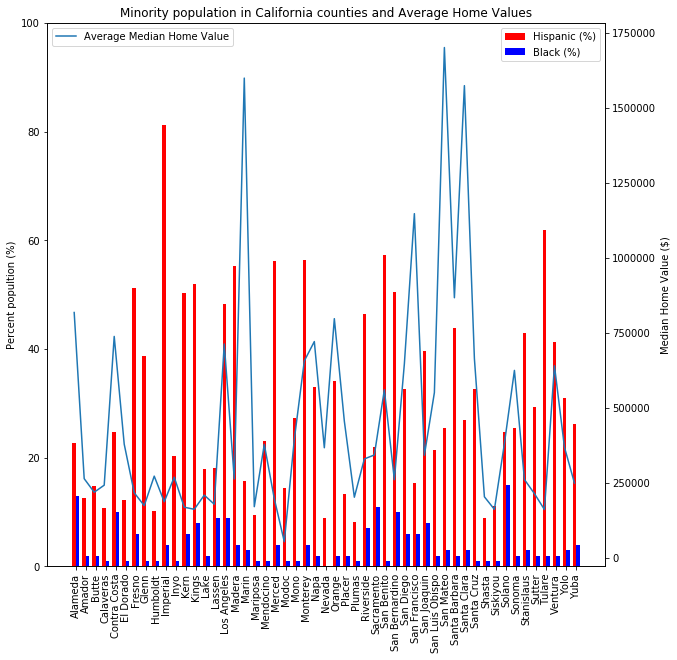

<Figure size 432x288 with 0 Axes>

In [9]:
# plot minority populaion and home median value vs counties

N=51
ind = np.arange(N)
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
width=0.35 # width of bars

ax1.bar(ind, y1, width, color="r")
ax1.bar(ind+width, y2, width, color="b")
ax3 = merged_minority_homes["Average Median Home Value"].plot(secondary_y=True)

ax1.set_title('Minority population in California counties and Average Home Values')

ax1.set_xticks(ind+ width/2)
ax1.set_xticklabels((merged_minority_homes["CountyName"]),rotation = 90)

ax1.set_ylim(0,100, auto = True)
ax1.legend(('Hispanic (%)', 'Black (%)'))
plt.legend(loc="upper left")

ax3.set_xlabel('California Counties')
ax1.set_ylabel("Percent popultion (%)")
ax3.set_ylabel("Median Home Value ($)")

plt.show()
plt.savefig("MinorityPopulationInCounties_and_MedianHomeValues.png")

In [10]:
%matplotlib inline
import scipy.stats as stats

p1=stats.pearsonr(y1,y3)[1]
p2=stats.pearsonr(y2,y3)[1]
#p3=stats.pearsonr((y1+y2),y3)[1]

print(f"p-value for %Hispanic population & Median home value: {p1}, --> no correlation.")
print(f"p-value for %Black population & Median home value: {p2}, --> no correlation.")

p-value for %Hispanic population & Median home value: 0.5927314329741257, --> no correlation.
p-value for %Black population & Median home value: 0.6564546628142199, --> no correlation.


# Get Crime Rate and Law Enforcement Data

In [11]:
# Read and arrange city home value data from Zillow (https://www.zillow.com/research/data/)
# Calculate average of the median by month in year 2016

city_homes_data = pd.read_csv("City_Homes.csv")
city_homes_data["Average Median Home Value"] = (city_homes_data["2016-01"]+city_homes_data["2016-02"]+city_homes_data["2016-03"]+city_homes_data["2016-04"]+
                              city_homes_data["2016-05"]+city_homes_data["2016-06"]+city_homes_data["2016-07"]+city_homes_data["2016-08"]+
                              city_homes_data["2016-09"]+city_homes_data["2016-10"]+city_homes_data["2016-11"]+city_homes_data["2016-12"])/12
city_homes_data = city_homes_data[["City", "State", "Average Median Home Value"]]
city_homes_data.head()

,City,State,Average Median Home Value
0,New York,NY,577450.000000
1,Los Angeles,CA,580283.333333
2,Chicago,IL,211350.000000
3,Houston,TX,153700.000000
4,Philadelphia,PA,118308.333333


In [12]:
# Read and arrange city offenses data from FBI (https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/offenses-known-to-law-enforcement)

city_offenses_data = pd.read_excel("City_Offenses.xls")
city_offenses_data = city_offenses_data[["City", "Population", "Violent crime", "Violent crime rate"]]
city_offenses_data.head()

,City,Population,Violent crime,Violent crime rate
0,Abbeville,23052.0,162.0,702.758980
1,Aberdeen,69821.0,313.0,448.289197
2,Aberdeen Township,18562.0,18.0,96.972309
3,Abernathy,2728.0,3.0,109.970674
4,Abilene,129024.0,554.0,429.377480


In [13]:
# Merge offenses data with home value data

merged_offenses_homes = pd.merge(city_homes_data, city_offenses_data, on="City", how="inner")
merged_offenses_homes.head()

,City,State,Average Median Home Value,Population,Violent crime,Violent crime rate
0,New York,NY,577450.000000,8566917.0,49124.0,573.415150
1,Los Angeles,CA,580283.333333,4007905.0,28817.0,719.004068
2,Chicago,IL,211350.000000,2725153.0,30126.0,1105.479215
3,Houston,TX,153700.000000,2338653.0,23963.0,1024.649659
4,Houston,MS,70866.666667,2338653.0,23963.0,1024.649659


# Crime Rate vs Home Value

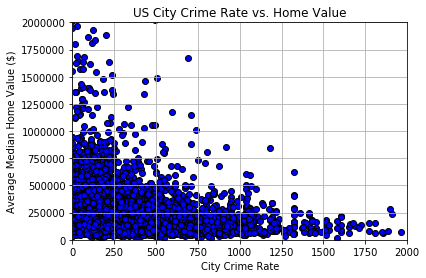

In [14]:
# Create scatter plot of home value against crime rate

plt.scatter(merged_offenses_homes["Violent crime rate"], merged_offenses_homes["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("US City Crime Rate vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Crime Rate")
plt.xlim(0,2000)
plt.ylim(0,2000000)
plt.grid(True)

# Save Figure

plt.savefig("US_City_Crime_Rate_vs_Home_Value.png", bbox_inches="tight")

In [17]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(merged_offenses_homes["Violent crime rate"], merged_offenses_homes["Average Median Home Value"])
print("p-value is {}.".format(p))

if p < 0.05:
    print("The correlation between violent crime rate and home value in the U.S. is statistically significnat.")
else:
    print("The correlation between violent crime rate and home value in the U.S. is inconclusive.")

p-value is 1.8312317621847128e-10.


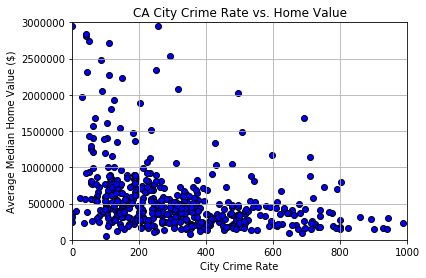

In [18]:
# Create same scatter plot for California cities only

ca_offenses_merged = merged_offenses_homes.loc[merged_offenses_homes["State"] == "CA"]

plt.scatter(ca_offenses_merged["Violent crime rate"], ca_offenses_merged["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("CA City Crime Rate vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Crime Rate")
plt.xlim(0,1000)
plt.ylim(0,3000000)
plt.grid(True)

# Save Figure

plt.savefig("CA_City_Crime_Rate_vs_Home_Value.png", bbox_inches="tight")

In [19]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(ca_offenses_merged["Violent crime rate"], ca_offenses_merged["Average Median Home Value"])
print("p-value is {}.".format(p))

if p < 0.05:
    print("The correlation between violent crime rate and home value in California is statistically significnat.")
else:
    print("The correlation between violent crime rate and home value in California is inconclusive.")

p-value is 2.9005656836394537e-13.


In [20]:
# Read and arrange law enforcement data from FBI (https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/police-employees)
# Calculate number of law enforcement employees per 10,000 population

city_law_enforcement_data = pd.read_excel("City_Law_Enforcement.xls")
city_law_enforcement_data["Law enforcement per 10K population"] = city_law_enforcement_data["Total law\nenforcement\nemployees"]/city_law_enforcement_data["Population"]*10000
city_law_enforcement_data = city_law_enforcement_data[["City", "Population", "Total law\nenforcement\nemployees", "Law enforcement per 10K population"]]
city_law_enforcement_data.head()

,City,Population,Total law enforcement employees,Law enforcement per 10K population
0,Abbeville,2608.0,17,65.184049
1,Alabaster,33040.0,80,24.213075
2,Albertville,21525.0,69,32.055749
3,Andalusia,9071.0,36,39.686914
4,Anniston,22205.0,107,48.187345


In [21]:
# Merge law enforcement data with home value data

merged_law_enforcement_homes = pd.merge(city_homes_data, city_law_enforcement_data, on="City")
merged_law_enforcement_homes.head()

,City,State,Average Median Home Value,Population,Total law enforcement employees,Law enforcement per 10K population
0,New York,NY,577450.000000,8566917.0,51399,59.997079
1,Los Angeles,CA,580283.333333,4007905.0,12692,31.667417
2,Chicago,IL,211350.000000,2725153.0,13135,48.199129
3,Houston,TX,153700.000000,964.0,2,20.746888
4,Houston,TX,153700.000000,2081.0,6,28.832292


# Law Enforcement vs Home Value

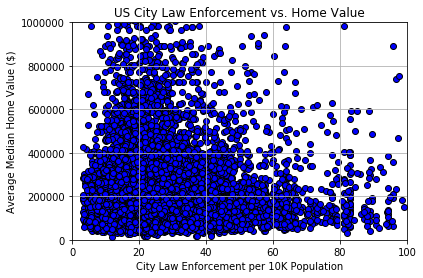

In [22]:
# Create scatter plot of home value against law enforcement

plt.scatter(merged_law_enforcement_homes["Law enforcement per 10K population"], merged_law_enforcement_homes["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("US City Law Enforcement vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Law Enforcement per 10K Population")
plt.xlim(0,100)
plt.ylim(0,1000000)
plt.grid(True)

# Save Figure

plt.savefig("US_City_Law_Enforcement_vs_Home_Value.png", bbox_inches="tight")

In [23]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(merged_law_enforcement_homes["Law enforcement per 10K population"], merged_law_enforcement_homes["Average Median Home Value"])
print("p-value is {}.".format(p))

if p < 0.05:
    print("The correlation between law enforcement and home value in the U.S. is statistically significnat.")
else:
    print("The correlation between law enforcement and home value in the U.S. is inconclusive.")

p-value is 0.36340464404239514.


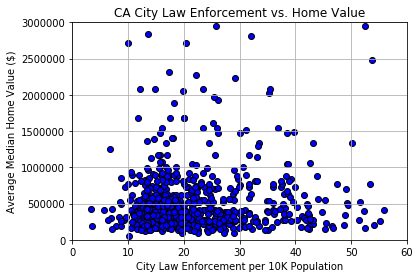

In [24]:
# Create same scatter plot for California cities only

ca_law_enforcement_merged = merged_law_enforcement_homes.loc[merged_law_enforcement_homes["State"] == "CA"]

plt.scatter(ca_law_enforcement_merged["Law enforcement per 10K population"], ca_law_enforcement_merged["Average Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("CA City Law Enforcement vs. Home Value")
plt.ylabel("Average Median Home Value ($)")
plt.xlabel("City Law Enforcement per 10K Population")
plt.xlim(0,60)
plt.ylim(0,3000000)
plt.grid(True)

# Save Figure

plt.savefig("CA_City_Law_Enforcement_vs_Home_Value.png", bbox_inches="tight")

In [25]:
# Calculate p-value using pearsonr

(coefficient, p) = pearsonr(ca_law_enforcement_merged["Law enforcement per 10K population"], ca_law_enforcement_merged["Average Median Home Value"])
print("p-value is {}.".format(p))

if p < 0.05:
    print("The correlation between law enforcement and home value in California is statistically significnat.")
else:
    print("The correlation between law enforcement and home value in California is inconclusive.")

p-value is 0.9304844962717338.
